<class 'PIL.JpegImagePlugin.JpegImageFile'>


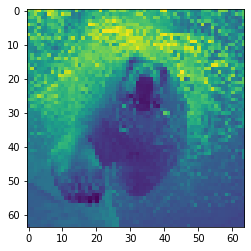

In [1]:
from numpy import *
# Load the mandrill image
from PIL import Image
mandrill = Image.open('../images/bear.jpg')
print(type(mandrill))
mandrill=mandrill.convert('L')

mandrill = mandrill.resize((64,64))
mandrill = asarray( mandrill )

# Show mandrill
from matplotlib.pyplot import *
figure(1)
imshow(mandrill)

In [4]:
from dtcwt_scattering import DtcwtScattering2D

scat = DtcwtScattering2D()
coef = scat.transform(mandrill, 2)
print(len(coef))

241


In [ ]:
import numpy as np

transform = dtcwt.Transform2d()

def transform_image(image, m):
    n = len(image)
    J = int(log(n/4)/log(2)) + 1
    
    scat_coefficients = []
    image_t = transform.forward(image, nlevels=J)
    if n >= 4:
        scat_coefficients.append(abs(image_t.lowpass))
    
    if m != 0:
        for j in range(0, J):
            highpass = image_t.highpasses[j]
            for k in range(0, highpass.shape[2]):
                im = highpass[:,:,k]
                scat_coefficients = scat_coefficients + transform_image(im, m - 1)
    return scat_coefficients

In [ ]:
transform = dtcwt.Transform2d()

def layer(scattering_vector,image,m):
  n=len(image)
  J=int(log(n/4)/log(2))
  image_t=transform.forward(image, nlevels=J+1)
  if m<M:
    for j in range(J):
      for theta in range(image_t.highpasses[j].shape[2]):
        scattering_vector=layer(scattering_vector,abs(image_t.highpasses[j][:,:,theta]),m+1)
  return([image_t.lowpass]+scattering_vector)


M=1
scattering_vector=layer([],mandrill,0)
print(len(scattering_vector))
#1+6*4+6*36=241


In [ ]:
scattering_vector=log(scattering_vector)

In [ ]:
print(scattering_vector)

In [ ]:
feature_vector=[]
for S in scattering_vector:
  for i in S:
    for j in i:
      feature_vector=feature_vector+[j]

feature_vector=np.array(feature_vector)
n=len(feature_vector)

In [ ]:
from tensorflow.keras import *

model_w = Sequential()
model_w.add(layers.Dense(10, activation='linear', input_dim=n))
print(model_w.summary())

model_w.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_w.predict(feature_vector)